In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Malignant Comments Classifier Project\\train.csv")
df.head()


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape


(159571, 8)

In [5]:
#List the fields in our dataframe
print(df.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


It was observed that running train_test_split on the heavy preprocessed dataframe sometimes 
resulted in system going out of memory. Hence to avoid such cases, one extra line of code was added. 
The df.reindex code will shuffle the indices initially, so that later splitting dataset into training and 
testing will give fairer results.

In [6]:
df = df.reindex(np.random.permutation(df.index))


# Separate the comment field data and outcome labels


In [7]:
comment = df['comment_text']
print(comment.head())


132723    "\n\nYou made an identical post on Talk:Histor...
96538     Pete, you don't have a right to revert simply ...
119309    That was a statement to every one of you. All ...
80844     Not Prince\n\nYakub Alemsah is not sourced as ...
5217      "::Skookum1 2nd note: about the above.  There'...
Name: comment_text, dtype: object


In [8]:
label = df[['comment_text', 'malignant' , 'highly_malignant' , 'rude' , 'threat' , 'abuse','loathe']]
print(label.head())


                                             comment_text  malignant  \
132723  "\n\nYou made an identical post on Talk:Histor...          0   
96538   Pete, you don't have a right to revert simply ...          0   
119309  That was a statement to every one of you. All ...          0   
80844   Not Prince\n\nYakub Alemsah is not sourced as ...          0   
5217    "::Skookum1 2nd note: about the above.  There'...          0   

        highly_malignant  rude  threat  abuse  loathe  
132723                 0     0       0      0       0  
96538                  0     0       0      0       0  
119309                 0     0       0      0       0  
80844                  0     0       0      0       0  
5217                   0     0       0      0       0  


# Data Visualisations

Let us analyse the no. of comments having lengths varying from 0 to 1200


average length of comment: 394.139


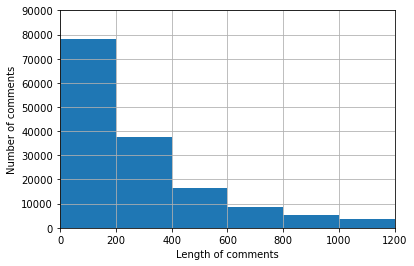

In [9]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()


Number of comments classified as abuse,abuse,....etc depending on their lengths


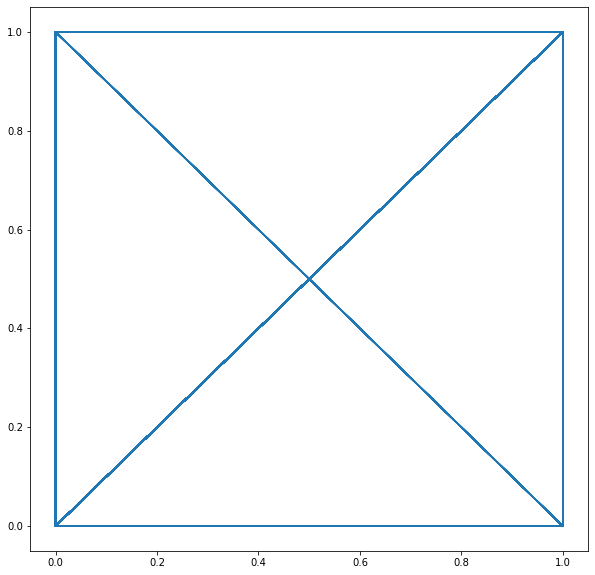

In [10]:
plt.figure(figsize=(10,10))
plt.plot(df['abuse'], df['highly_malignant'])


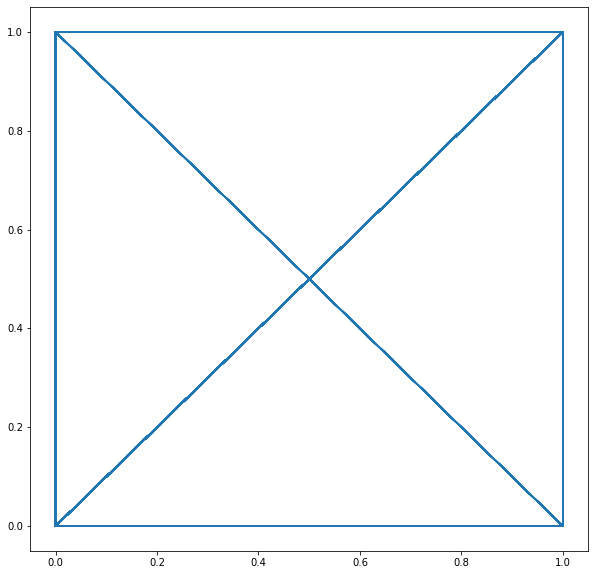

In [11]:
plt.figure(figsize=(10,10))
plt.plot(df['abuse'], df['rude'])


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

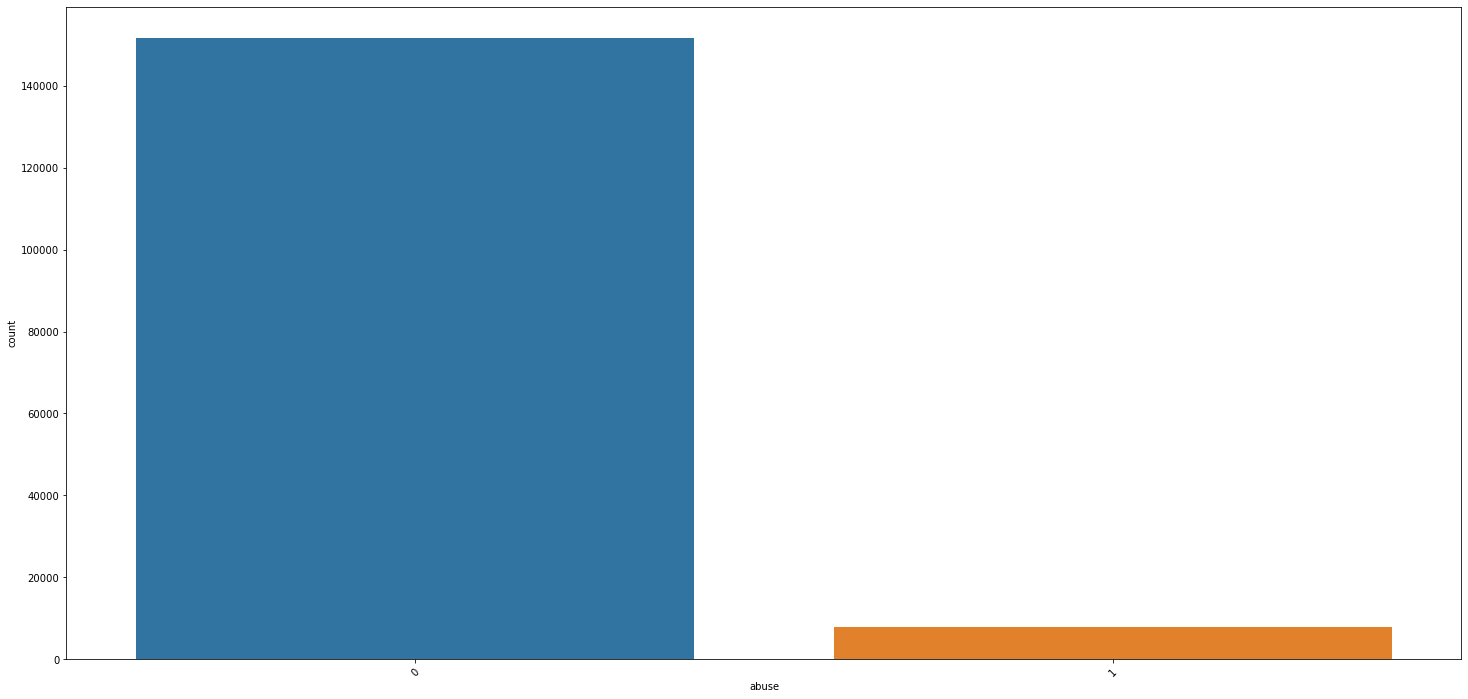

In [12]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'abuse', data = df)
plt.xticks(rotation = 45)


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

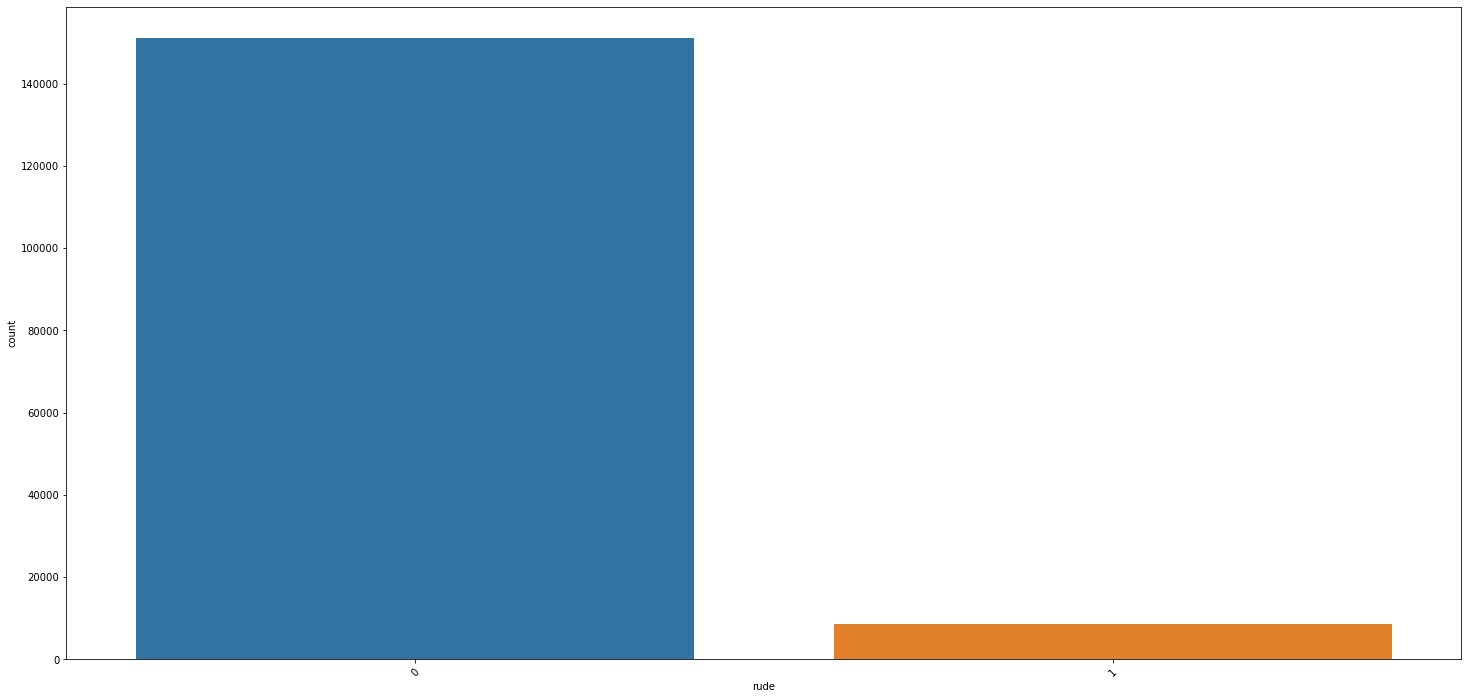

In [13]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'rude', data = df)
plt.xticks(rotation = 45)

In [14]:
prophet_df = df[['rude', 'comment_text']]
prophet_df

,rude,comment_text
132723,0,"""\n\nYou made an identical post on Talk:Histor..."
96538,0,"Pete, you don't have a right to revert simply ..."
119309,0,That was a statement to every one of you. All ...
80844,0,Not Prince\n\nYakub Alemsah is not sourced as ...
5217,0,"""::Skookum1 2nd note: about the above. There'..."
...,...,...
75610,0,Truce\nAlthough it is clear that we have not g...
107961,0,"""\nWhat gadfium is quietly ignoring is that fa..."
137348,0,I have added you to Missing Wikipedians \n\nJu...
1194,0,"""\n\n Your most excellent presence is requeste..."


In [15]:
prophet_df = prophet_df.rename(columns={'rude':'comment_text', 'malignant':'y'})
prophet_df


,comment_text,comment_text
132723,0,"""\n\nYou made an identical post on Talk:Histor..."
96538,0,"Pete, you don't have a right to revert simply ..."
119309,0,That was a statement to every one of you. All ...
80844,0,Not Prince\n\nYakub Alemsah is not sourced as ...
5217,0,"""::Skookum1 2nd note: about the above. There'..."
...,...,...
75610,0,Truce\nAlthough it is clear that we have not g...
107961,0,"""\nWhat gadfium is quietly ignoring is that fa..."
137348,0,I have added you to Missing Wikipedians \n\nJu...
1194,0,"""\n\n Your most excellent presence is requeste..."


In [16]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
132723,c61995b4d06ad45e,"""\n\nYou made an identical post on Talk:Histor...",0,0,0,0,0,0
96538,045a46f2b2dae67f,"Pete, you don't have a right to revert simply ...",0,0,0,0,0,0
119309,7dd6ae9835b8fae7,That was a statement to every one of you. All ...,0,0,0,0,0,0
80844,d8419b3f9c29dadb,Not Prince\n\nYakub Alemsah is not sourced as ...,0,0,0,0,0,0
5217,0de402ca99c5685d,"""::Skookum1 2nd note: about the above. There'...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
75610,ca4b6bf1d23a8729,Truce\nAlthough it is clear that we have not g...,0,0,0,0,0,0
107961,4116f8e0a35e5c08,"""\nWhat gadfium is quietly ignoring is that fa...",0,0,0,0,0,0
137348,ded80242236b1e01,I have added you to Missing Wikipedians \n\nJu...,0,0,0,0,0,0
1194,033984ba759fad61,"""\n\n Your most excellent presence is requeste...",0,0,0,0,0,0


<AxesSubplot:>

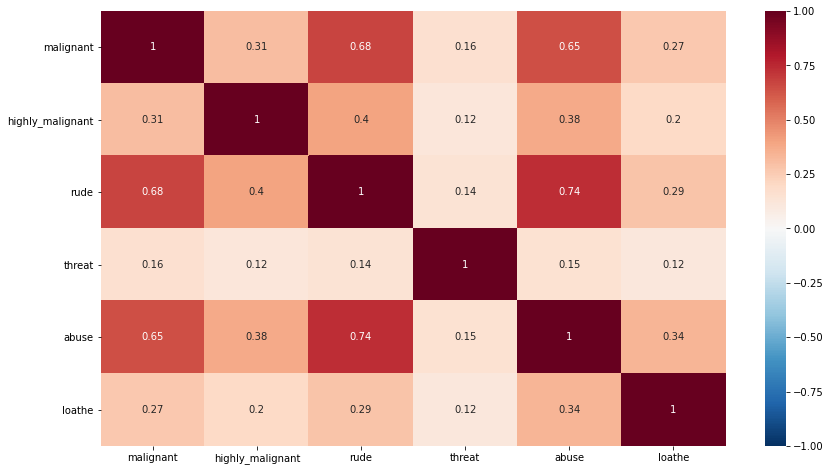

In [17]:
correlation = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")



# Free Form Visualisation
Let us have a plot showing the hamming-loss and log-loss of different models, which we selected.



In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools


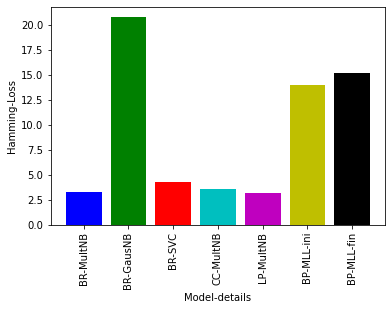

In [27]:
x = ['BR-MultNB','BR-GausNB','BR-SVC','CC-MultNB','LP-MultNB','BP-MLL-ini','BP-MLL-fin']
y = [3.27,20.74,4.26,3.56,3.17,13.96,15.158]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Hamming-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

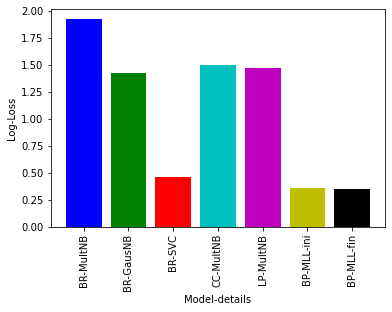

In [28]:
x = ['BR-MultNB','BR-GausNB','BR-SVC','CC-MultNB','LP-MultNB','BP-MLL-ini','BP-MLL-fin']
y = [1.92,1.422,0.46,1.5,1.47,0.36,0.35]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Log-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()


While showing among the best problem transformation method models, 
hamming-loss was considered (this is because for BP-MLL neural network we 
had to round the final results to get the hamming-loss because of the output being multivalued probabilities)
But while chosing among the best Adaptation Algorithm model, log loss was preferred.
 